In [1]:
from modelo import Linear
from utils import treine
import torch
import pickle
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


from simulation import gen_sinthetic_dataset
inp, out = gen_sinthetic_dataset()
inp_test, out_test = gen_sinthetic_dataset()
print(np.shape(inp))
print(np.shape(out))


/home/v/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([5, 20, 30])
torch.Size([5, 20, 1])


In [5]:
def Eval_metric(model, inp, out):
    
    size = np.shape(inp)[0]*np.shape(inp)[1]
    inp = inp.reshape(size, 30)
    out = out.reshape(size, 1)
    O = inp.float()
    A = out.float().detach().numpy()
    resposta = model(O).detach().numpy()
    tolerance = 0.1
    erro = 0
    acerto = 0
    for i in range(len(resposta)):
        if A[i] < 0.00001 and resposta[i] < [0.5]:
            acerto += 1
        elif A[i] > 0.9999 and resposta[i] > [0.5]:
            acerto += 1
        else:
            erro += 1
    #print('erro = ', erro/size)
    #print('acerto = ', acerto/size)
    return erro/size, acerto/size

In [6]:

def treine(model, epochs, inp, out, inp_test, out_test):
    optimizer = torch.optim.Adam(
        model.parameters(), lr=1e-4, weight_decay=1e-5)
    #inp = pickle.load(open("Input_Train", "rb"))
    #out = pickle.load(open("Train_Labels", "rb"))
    n_batch = np.shape(inp)[0]
    y1 = []
    y2 = []
    Epochs = []
    index = 5
    for epoch in range(epochs):
        for batch_idx in range(n_batch):
            O = inp[batch_idx]
            A = out[batch_idx]
            O = O.float()
            A = A.float()
            recon = model(O)
            loss = torch.mean((recon-A)**2)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if index == 5:
            Epochs.append(epoch)
            erro1, acerto_test = Eval_metric(model, inp_test, out_test)
            #print('após {} epocas de treino, '.format(epoch),
            #    'acertou {} do conjunto de teste'.format(acerto))
            erro2, acerto_trein = Eval_metric(model, inp, out)
            #print('após {} epocas de treino, '.format(epoch),
            #    'acertou {} do conjunto de treino'.format(acerto))
            y1.append(acerto_test)
            y2.append(acerto_trein)
            index = 0
        index +=1
    #print(y1)
    #print(y2)
    return y1,y2,Epochs

In [9]:
def eval_model(epochs):
    y1 = []
    y2 = []
    inp, out = gen_sinthetic_dataset()
    inp_test, out_test = gen_sinthetic_dataset()
    model = Linear()
    #erro, acerto = Eval_metric(model, 'test')
    #print('antes de treinar o modelo acertou {} do conjunto de teste'.format(acerto))
    #print('antes de treinar o modelo errou {} do conjunto de teste'.format(erro))
    acerto_test, acerto_trein, Epochs = treine(model, epochs,inp, out,inp_test, out_test)
    plt.plot(Epochs, acerto_test, label='acurácia-teste')
    #plt.plot(Epochs, acerto_trein, label='acurácia-treino')
    plt.legend()
    plt.xlabel('Epocas de treino')
    plt.title('Acurácia')
    plt.show()


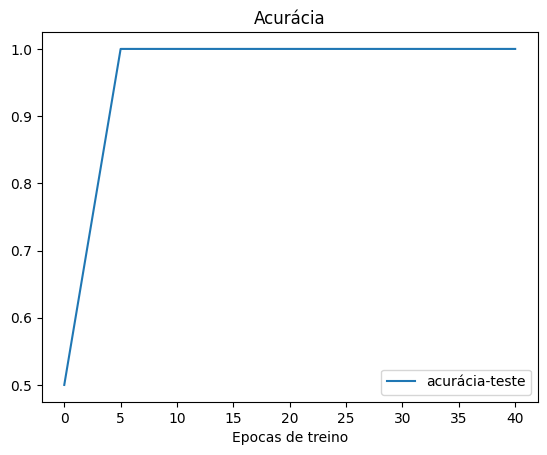

In [10]:
eval_model(45)

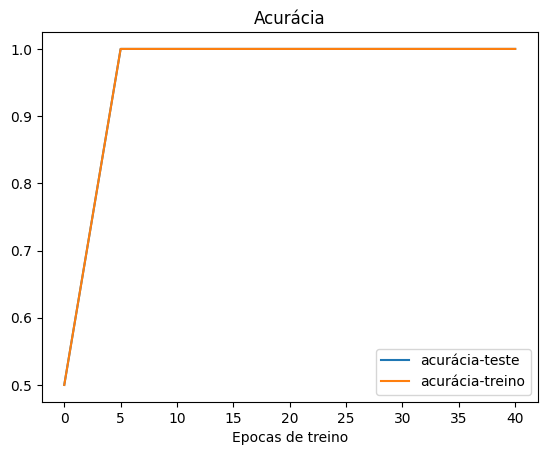

In [8]:
eval_model(45)

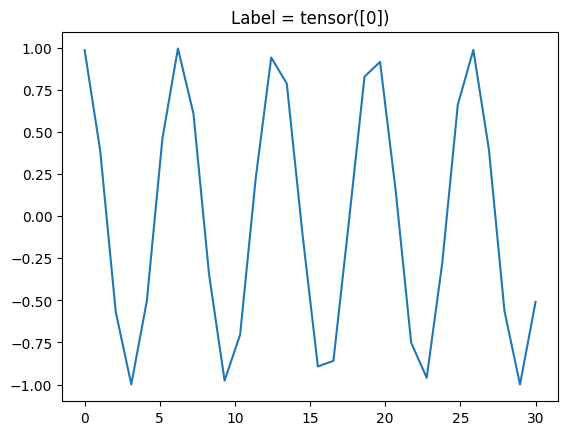

In [2]:
y = inp[0][0]
x = np.linspace(0,len(y),len(y))
plt.plot(x,y)
plt.title('Label = {}'.format(out[0][0]))
plt.show()

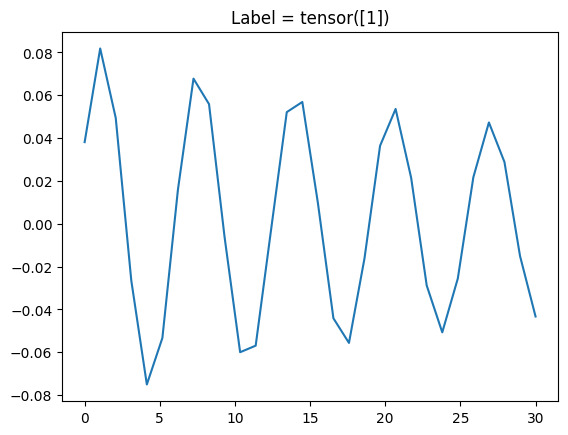

In [4]:
y = inp[0][1]
x = np.linspace(0,len(y),len(y))
plt.plot(x,y)
plt.title('Label = {}'.format(out[0][1]))
plt.show()